# 02.6 Clasificación - Ejercicio para entregar sobre variedades vínicolas


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import numpy as np

## Se va a utilizar un archivo con información de variedades vinícolas

In [3]:
# Se preparan las columnas a tratar
import pandas as pd
df_wine = pd.read_csv('data/wine.csv', header=None)
df_wine.columns = ['Class label', 'Alcohol',
    'Malic acid', 'Ash',
    'Alcalinity of ash',
    'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines'
    ,'Proline']
# Se borra la clase 1
df_wine = df_wine[df_wine['Class label'] != 1]
df_wine.head()
# Se toma el campo 'Class label' como variable objetivo y
# Se toman los campos 'Alcohol' y 'OD280/OD315 of diluted wines' como características sobre una matriz X
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values
np.unique(y)

array([2, 3], dtype=int64)

### Presentar una vista del dataframe cargado

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
59            2    12.37        0.94  1.36               10.6         88   
60            2    12.33        1.10  2.28               16.0        101   
61            2    12.64        1.36  2.02               16.8        100   
62            2    13.67        1.25  1.92               18.0         94   
63            2    12.37        1.13  2.16               19.0         87   

    Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
59           1.98        0.57                  0.28             0.42   
60           2.05        1.09                  0.63             0.41   
61           2.02        1.41                  0.53             0.62   
62           2.10        1.79                  0.32             0.73   
63           3.50        3.10                  0.19             1.87   

    Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
59             1.95  1.05                          1.82      520  
60             3.27  1.25                          1.67      680  
61             5.75  0.98                          1.59      450  
62             3.80  1.23                          2.46      630  
63             4.45  1.22                          2.87      420

### Preproceso de datos

__NOTA A sklearn.metrics__:__ Algunas métricas se definen esencialmente para tareas de clasificación binaria (por ejemplo, f1_score, roc_auc_score). En estos casos, por defecto solo se evalúa la etiqueta positiva, asumiendo por defecto que la clase positiva está etiquetada como 1 (aunque esto puede configurarse a través del __parámetro pos_label__).

Por lo tanto hay dos alternativas:

- __Se recodifica la variable objetivo y__, que contiene la etiqueta 'Class label' para que adopte los valores (0,1)
- __Este ejemplo se convierte en una clasificación binaria__, y se pueden mostrar sus métricas con sklearn.metrics

La otra posibilidad es:
- __No alterar los valores de y__
- Indicar en las llamadas a __sklearn.metrics__ en __pos_label__ la etiqueta que funciona como verdadero (3 por ejemplo).

__Y finalmente se trocea el conjunto de entrada en entrenamiento 80% y prueba 20%__

In [4]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)
print(np.unique(y))
# Troceamos las caracteristicas de X en un 80% de entrenamiento y un 20% de prueba


[2 3]


### Hacer un entrenamiento con la clase GaussianNB que implementa naive-Bayes en sk-learn

- Entrenar el modelo con X_train, y_train
- Validar con X_test, y_test utilizando la librería sklearn.metrics. Al ser una clasificación binario se pueden obtener métricas tal como exactitud, precisión y sensibilidad
- Se puede verificar que la exactitud coincide con el recuento de aciertos

Exactitud - Accuracy: 0.917
Precision: 0.833
Sensibilidad - Recall: 1.000
F1: 0.909


Exactitud del clasificador (porcentaje de aciertos) = 91.66666666666667 



### Se muestra la correspondiente matriz de confusión

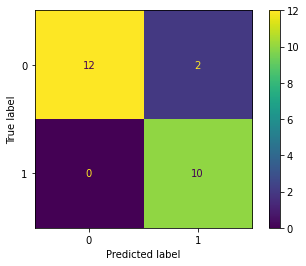

### Repetir el entrenamiento con la clase  DecissionTreeClassifier que implementa el árbol de decisión en sk-learn

- Entrenar el modelo con X_train, y_train
- Validar con X_test, y_test utilizando la librería sklearn.metrics. 
- Matriz de confusión

Exactitud - Accuracy: 0.833
Precision: 0.800
Sensibilidad - Recall: 0.800
F1: 0.800


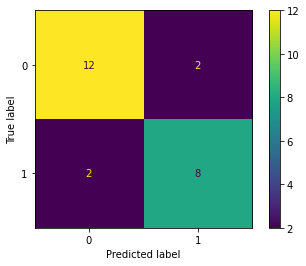

### De forma volutaria, se puede buscar la documentación de la clase RandomForestClassifier

__Esta clase está implementada en la librería sklearn.ensemble__

__RamdomForest implementa internamente varios árboles de decisión que se ensamblan y se toma como resultado para la clasificación el voto mayoritario__

__Parámetros principales del constructor__:

- __n_estimators__ : número de árboles, 100 por defecto
- __criterion__ : criterio de partición ('gini', 'entropy'), por defecto es 'gini'.

Para más información:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### De forma voluntaria también se puede aplicar la implementación del Bagging

Se realizarán 100 repeticiones utilizando árboles de decisión

__Ahora se hace uso de N clasificadores entrenados para predecir con voto mayoritario el conjunto de test__ 

__Se usa la moda como forma de obtener la etiqueta más votada__